<h2>Data Preparation</h2>

In [289]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [290]:
pd.options.display.float_format = '{:.3f}'.format
data_ = pd.read_csv("data_input/ThoraricSurgery.csv")

In [291]:
data_.head(2)

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Y
0,DGN2,2.880,2.160,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.400,1.880,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F


In [292]:
data_.shape

(470, 17)

<h4>Rename Column</h4>

In [293]:
data_.rename(columns = {'DGN':'dgn','PRE4':'pre4','PRE5':'pre5',
                        'PRE6':'pre6','PRE7':'pre7','PRE8':'pre8',
                        'PRE9':'pre9','PRE10':'pre10','PRE11':'pre11',
                        'PRE14':'pre14','PRE17':'pre17','PRE19':'pre19',
                        'PRE25':'pre25','PRE30':'pre30','PRE32':'pre32',
                        'AGE':'age','Risk1Y':'risk_1_year'},inplace=True)

<h4>Change Data Type</h4>

In [294]:
data_.dtypes

dgn             object
pre4           float64
pre5           float64
pre6            object
pre7            object
pre8            object
pre9            object
pre10           object
pre11           object
pre14           object
pre17           object
pre19           object
pre25           object
pre30           object
pre32           object
age              int64
risk_1_year     object
dtype: object

In [295]:
data_[['dgn','pre6','pre7','pre8','pre9','pre10','pre11','pre14','pre17','pre19','pre25','pre30','pre32','risk_1_year']] = \
data_[['dgn','pre6','pre7','pre8','pre9','pre10','pre11','pre14','pre17','pre19','pre25','pre30','pre32','risk_1_year']].\
astype('category')
data_.dtypes

dgn            category
pre4            float64
pre5            float64
pre6           category
pre7           category
pre8           category
pre9           category
pre10          category
pre11          category
pre14          category
pre17          category
pre19          category
pre25          category
pre30          category
pre32          category
age               int64
risk_1_year    category
dtype: object

<h4>Check Missing Values</h4>

In [296]:
data_.isna().sum()

dgn            0
pre4           0
pre5           0
pre6           0
pre7           0
pre8           0
pre9           0
pre10          0
pre11          0
pre14          0
pre17          0
pre19          0
pre25          0
pre30          0
pre32          0
age            0
risk_1_year    0
dtype: int64

<h2>Exploratory Data Analysis</h2>

<h4>Check Correlation</h4>

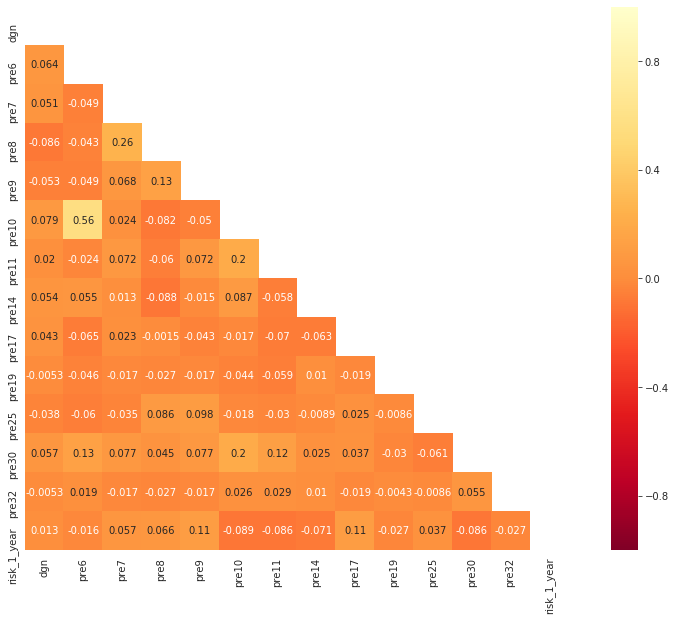

In [297]:
#for categorical data
data_cat = data_.select_dtypes('category')
pd.set_option('precision', 3)
correlation_=data_cat.apply(lambda x : pd.factorize(x)[0]).corr(method='spearman', min_periods=1)
mask = np.zeros_like(correlation_)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(correlation_,mask=mask,square=True,annot=True,vmin=-1,vmax=1,cmap="YlOrRd_r")

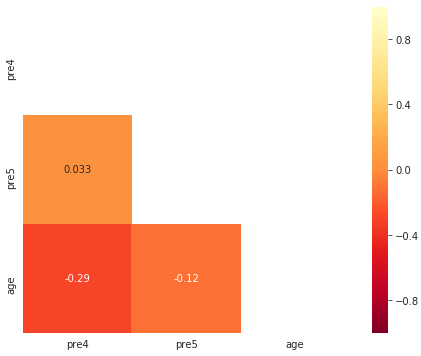

In [298]:
#for numerical data
pd.set_option('precision', 3)
correlation=data_.corr(method='pearson')
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 6))
    ax = sns.heatmap(correlation,mask=mask,square=True,annot=True,vmin=-1,vmax=1,cmap="YlOrRd_r")

<h4>Check Ditribution Numerical Data</h4>

In [299]:
data_new = data_[['pre4','pre5','age']]
data_new.describe()

,pre4,pre5,age
count,470.000,470.000,470.000
mean,3.282,4.569,62.534
std,0.871,11.768,8.707
min,1.440,0.960,21.000
25%,2.600,1.960,57.000
50%,3.160,2.400,62.000
75%,3.808,3.080,69.000
max,6.300,86.300,87.000


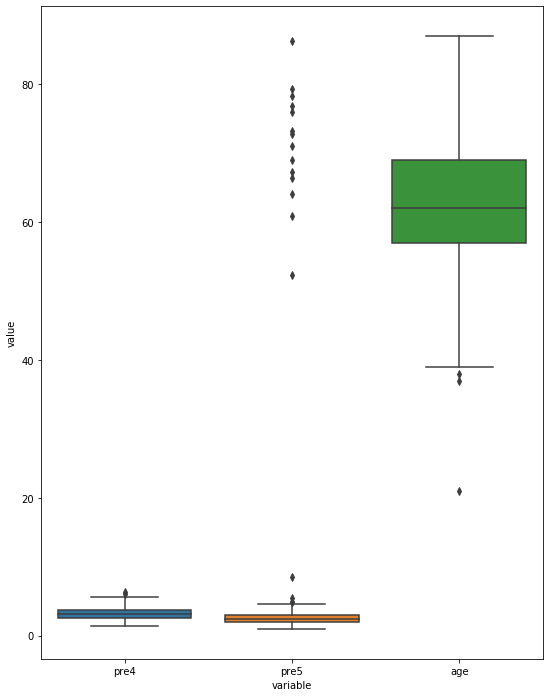

In [300]:
plt.figure(figsize=(9,12))
sns.boxplot(x="variable", y="value", data=pd.melt(data_new))

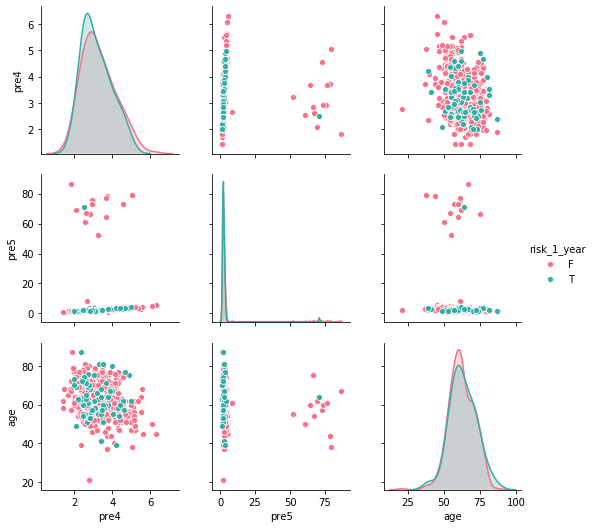

In [301]:
sns.pairplot(data_, hue='risk_1_year', palette="husl", diag_kind = "kde")

<h4>Check and Remove Outliers</h4>

In [302]:
Q1 = data_new.quantile(0.25)
Q3 = data_new.quantile(0.75)
IQR = Q3 - Q1

In [303]:
#count of outliers
((data_new < (Q1 - 1.5 * IQR)) | (data_new > (Q3 + 1.5 * IQR))).sum()

pre4     2
pre5    18
age      3
dtype: int64

In [304]:
data_ = data_[~((data_new < (Q1 - 1.5 * IQR)) |(data_new > (Q3 + 1.5 * IQR))).any(axis=1)]
data_.shape

(450, 17)

<h4>Distribution after removing outliers</h4>

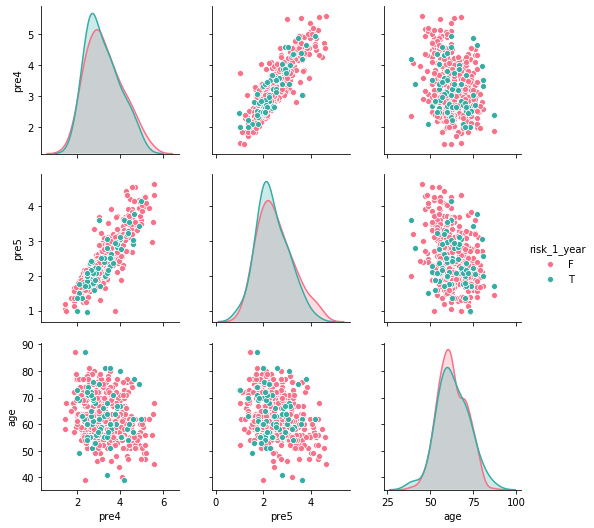

In [305]:
sns.pairplot(data_, hue='risk_1_year', palette="husl", diag_kind = "kde")

<h4>Check Proportion Class Target</h4>

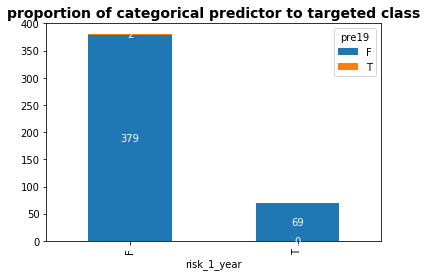

In [306]:
def plotProportion(data):
    ax = data_.groupby(['risk_1_year', 'pre19']).size().unstack().plot(kind='bar', stacked=True)
    for rect in ax.patches:
        height = rect.get_height()
        width = rect.get_width()
        padding = 0.25

        ax.text(rect.get_x() + width - padding, 
                rect.get_y() + height / 2, 
                int(height), 
                ha = 'center', va = 'center',
                color = "white")

plotProportion(data_)
plt.title("proportion of categorical predictor to targeted class", fontsize = 14, fontweight = "bold")
plt.show()

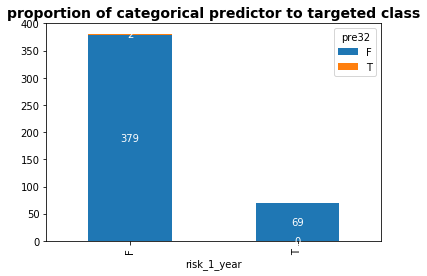

In [307]:
def plotProportion(data):
    ax = data_.groupby(['risk_1_year', 'pre32']).size().unstack().plot(kind='bar', stacked=True)
    for rect in ax.patches:
        height = rect.get_height()
        width = rect.get_width()
        padding = 0.25

        ax.text(rect.get_x() + width - padding, 
                rect.get_y() + height / 2, 
                int(height), 
                ha = 'center', va = 'center',
                color = "white")

plotProportion(data_)
plt.title("proportion of categorical predictor to targeted class", fontsize = 14, fontweight = "bold")
plt.show()

In [308]:
data_.drop(['pre19','pre32','dgn'], inplace=True, axis=1)

C:\Users\litaimut\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [309]:
data_.shape

(450, 14)

Survival 85.0 %
Died within 1 Year 15.0 %


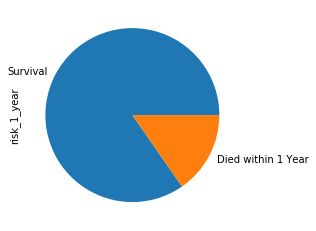

In [310]:
data_['risk_1_year'].value_counts().plot(kind = 'pie', labels = [ 'Survival','Died within 1 Year'])
print('Survival', round(data_['risk_1_year'].value_counts()['F']/len(data_) * 100), '%')
print('Died within 1 Year', round(data_['risk_1_year'].value_counts()['T']/len(data_) * 100), '%')

<h4>Upsampling Process</h4>

In [311]:
#doing upsampling
from sklearn.utils import resample

died = data_[data_.risk_1_year == 'T']
survive = data_[data_.risk_1_year == 'F']

died_upsampling = resample(died, replace=True, n_samples = len(survive), random_state = 42)

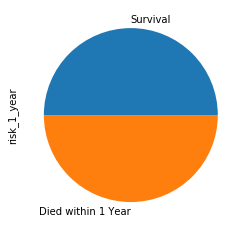

In [312]:
died_upsampling = pd.concat([survive,died_upsampling])
died_upsampling['risk_1_year'].value_counts()
died_upsampling['risk_1_year'].value_counts().plot(kind = 'pie', labels = [ 'Survival','Died within 1 Year'])

<h2>Modelling</h2>

<h4>Get Dummies for Categorical Data</h4>

In [313]:
cat_columns = data_.select_dtypes(['category']).columns
data_new = pd.get_dummies(data_, columns = cat_columns, drop_first = True)

In [314]:
data_new

,pre4,pre5,age,pre6_PRZ1,pre6_PRZ2,pre7_T,pre8_T,pre9_T,pre10_T,pre11_T,pre14_OC12,pre14_OC13,pre14_OC14,pre17_T,pre25_T,pre30_T,risk_1_year_T
0,2.880,2.160,60,1,0,0,0,0,1,1,0,0,1,0,0,1,0
1,3.400,1.880,51,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2.760,2.080,59,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3,3.680,3.040,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.440,0.960,73,0,1,0,1,0,1,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,3.880,2.120,63,1,0,0,0,0,1,0,0,1,0,0,0,1,0
466,3.760,3.120,61,0,0,0,0,0,0,0,0,0,0,0,0,1,0
467,3.040,2.080,52,1,0,0,0,0,1,0,0,1,0,0,0,0,0
468,1.960,1.680,79,1,0,0,0,0,1,1,1,0,0,0,0,1,0


<h4>Cross Validation Process</h4>

In [315]:
#separate predictor and target
X = data_new.drop('risk_1_year_T', axis=1)
y = data_new.risk_1_year_T.values

#setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (360, 16)
X_test: (90, 16)
y_train: (360,)
y_test: (90,)


Model 1

In [316]:
lr = LogisticRegression(multi_class='ovr',solver='liblinear').fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [317]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

accuracy_score(y_test, lr_pred)

0.8222222222222222

<h4>Feature Engineering</h4>

In [318]:
def fitLogisticRegression(X, y):
    model = sm.Logit(y, sm.add_constant(X))
    result = model.fit()
    return result

model_all = fitLogisticRegression(X_train, y_train)
print(model_all.summary())



C:\Users\litaimut\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  360
Model:                          Logit   Df Residuals:                      343
Method:                           MLE   Df Model:                           16
Date:                Tue, 07 Apr 2020   Pseudo R-squ.:                     inf
Time:                        10:15:07   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5181      1.679     -1.500      0.134      -5.809       0.773
pre4           0.2220      0.398  

C:\Users\litaimut\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\litaimut\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\litaimut\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [ ]:
# Xtrain_removed = data_new.drop(['pre4','pre5','age','pre6_PRZ1','pre6_PRZ2','pre7_T','pre8_T','pre10_T','pre11_T','pre14_OC12',\
#                   'pre25_T','pre30_T'],inplace=True,axis=1)
# Xtest_removed =  data_new.drop(['pre4','pre5','age','pre6_PRZ1','pre6_PRZ2','pre7_T','pre8_T','pre10_T','pre11_T','pre14_OC12',\
#                   'pre25_T','pre30_T'],inplace=True,axis=1)
# model_new = fitLogisticRegression(Xtrain_removed, y_train)
# print(model_removed.summary())